In [2]:
# code here
import cv2
import matplotlib.pyplot as plt
import numpy as np

def Otsu(img):
    hist = cv2.calcHist([img],[0],None,[256],[0,256]).astype(int)
    hist = hist[::,0]

    sum = (np.sum(hist))
    prob = (1.0 * hist) / sum

    accup = np.zeros(256).astype(float)
    accum = np.zeros(256).astype(float)
    otsu = np.zeros(257).astype(float)

    accup[0] = prob[0]
    accum[0] = 0 * prob[0]

    i = (int)(1)
    while(i < 256):
        accup[i] = accup[i - 1] + prob[i]
        accum[i] = accum[i - 1] + i * prob[i]
        i += 1

    mg = (float)(accum[255])

    va = (float)(0)
    i = (int)(0)
    while(i < 256):
        va += prob[i] * (i - mg)**2
        i += 1

    i = (int)(0)
    while(i < 256):

        if(0 < accup[i] and accup[i] < 1):
            otsu[i] = (float)((mg * accup[i] - accum[i])**2 / (accup[i] * (1 - accup[i])))

        else:
            otsu[i] = 0

        i += 1

    best = (float)(np.max(otsu))

    s = (int)(0)
    q = (int)(0)

    i = (int)(0)

    while(i < 256):

        if(otsu[i] == best):
            s += i
            q += 1

        i += 1
        
    otsu[256] = (1.0 * s) / q

    return otsu



1)	A partir da imagem original obtenha as outras imagens conforme descrição

Desejamos separar linhas de círculos. Uma operação de abertura com um elemento estruturante na forma de círculo (definir o raio) faz essa tarefa.


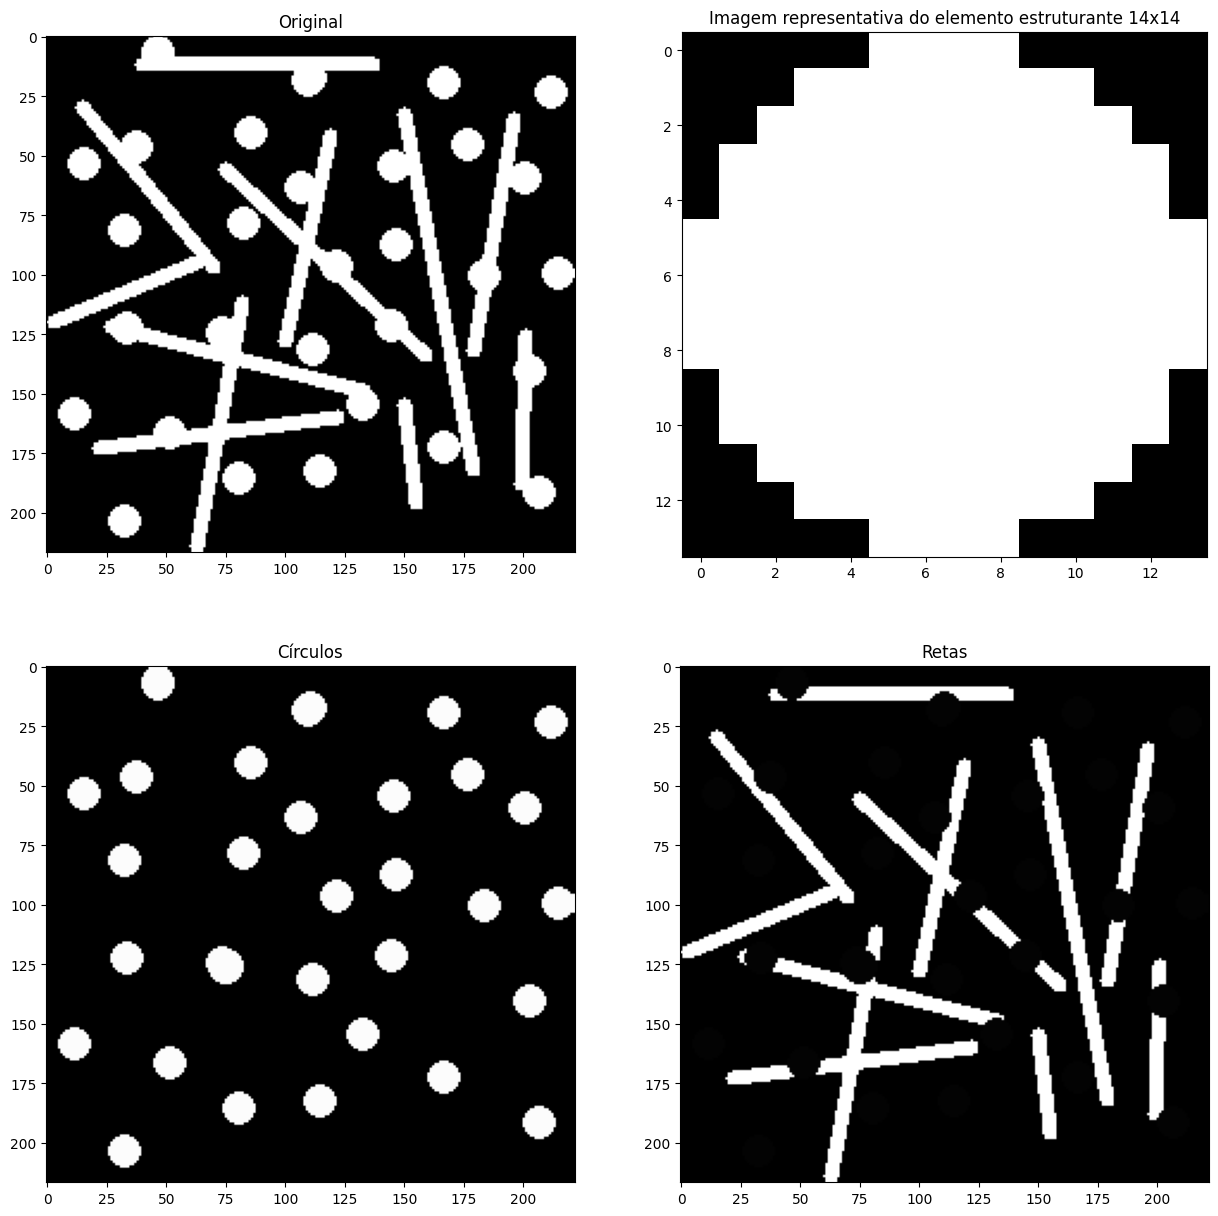

In [3]:
img1 = cv2.imread("art3.png", cv2.IMREAD_GRAYSCALE)

kernel = np.matrix([[0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
                    [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
                    [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
                    [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
                    [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
                    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                    [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
                    [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
                    [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
                    [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
                    [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0]]).astype(np.uint8)

imgkernel = kernel * 255

img21 = cv2.erode(img1, kernel, iterations=1, anchor = (6,6)) 
img21 = cv2.dilate(img21, kernel, iterations=1, anchor = (6,6)) 

img22 = cv2.erode(img1, kernel, iterations=1, anchor = (6,7)) 
img22 = cv2.dilate(img22, kernel, iterations=1, anchor = (6,7)) 

img23 = cv2.erode(img1, kernel, iterations=1, anchor = (7,6)) 
img23 = cv2.dilate(img23, kernel, iterations=1, anchor = (7,6)) 

img24 = cv2.erode(img1, kernel, iterations=1, anchor = (7,7)) 
img24 = cv2.dilate(img24, kernel, iterations=1, anchor = (7,7))

img2 = img21 + img22 + img23 + img24

kernel = np.matrix([[1,1,1],
                    [1,1,1],
                    [1,1,1]]).astype(np.uint8)

img2 = cv2.erode(img2, kernel, iterations=1)

img3 = img1 - img2

plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
plt.title('Original')
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)

plt.subplot(2, 2, 2)
plt.title('Imagem representativa do elemento estruturante 14x14')
plt.imshow(imgkernel, cmap='gray', vmin=0, vmax=255)

plt.subplot(2, 2, 3)
plt.title('Círculos')
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)

plt.subplot(2, 2, 4)
plt.title('Retas')
plt.imshow(img3, cmap='gray', vmin=0, vmax=255)

2)

a) Obter linhas verticais. Abertura com elemento estruturante vertical 3x9
b) Obter linhas horizontais. Abertura com elemento estruturante horizontal 9x3. Tente eliminar as linhas erradas usando uma máscara maior


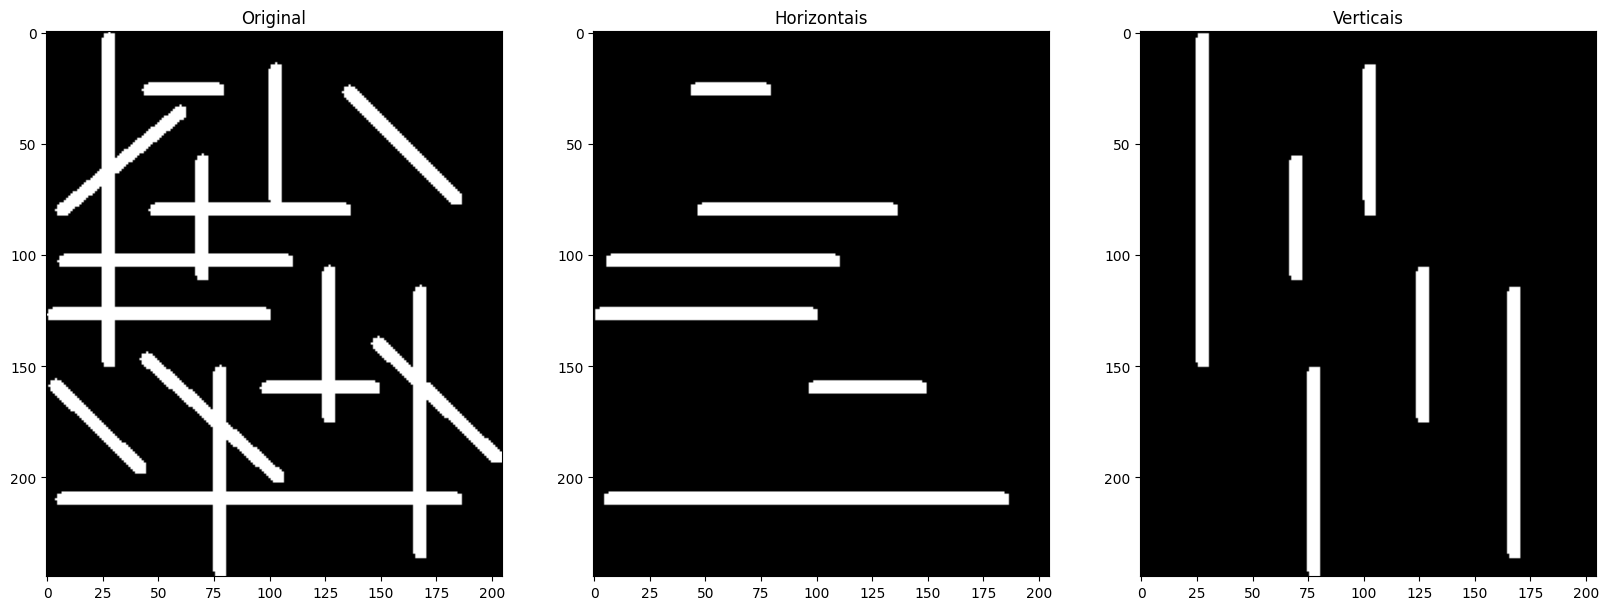

In [4]:
img1 = cv2.imread("art2.png", cv2.IMREAD_GRAYSCALE)

kernel = np.matrix([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]).astype(np.uint8)

img2 = cv2.erode(img1, kernel, iterations=1) 
img2 = cv2.dilate(img2, kernel, iterations=1) 

kernel = np.matrix([[1, 1, 1],
                    [1, 1, 1],
                    [1, 1, 1],
                    [1, 1, 1],
                    [1, 1, 1],
                    [1, 1, 1],
                    [1, 1, 1],
                    [1, 1, 1],
                    [1, 1, 1]]).astype(np.uint8)

img3 = cv2.erode(img1, kernel, iterations=1) 
img3 = cv2.dilate(img3, kernel, iterations=1) 

plt.figure(figsize=(20, 15))

plt.subplot(1, 3, 1)
plt.title('Original')
plt.imshow(img1, cmap='gray', vmin=0, vmax=255);

plt.subplot(1, 3, 2)
plt.title('Horizontais')
plt.imshow(img2, cmap='gray', vmin=0, vmax=255);

plt.subplot(1, 3, 3)
plt.title('Verticais')
plt.imshow(img3, cmap='gray', vmin=0, vmax=255);

3)

a) Theshold (t=210)

b) Utilizando abertura com elemento circular de 11 pixels para reter as células grandes

c) É possível reter somente os objetos pequenos utilizando a operação abertura?

    Somente com a operação abertura não, pois
    
        . elementos estruturante pequenos não eliminam os obejtos grandes na operação de erosão
        . elementos estruturante grandes eliminam os obejtos pequenos na operação de erosão

    e a abertura consiste em erodir e depois dilatar nunca conseguiremos separar os grandes do pequenos dessa maneira.

    Porém uma solução que utiliza a abertura e a operação de subtração seria o seguinte

        . utilizar abertura com elemento estruturante grande retem os objetos grandes (chamaremos a nova imagem de img2)
        . fazer a subtração da imagem original com a img2

    Assim conseguimos separar os pequenos separando os grandes e depois os tirando da original.

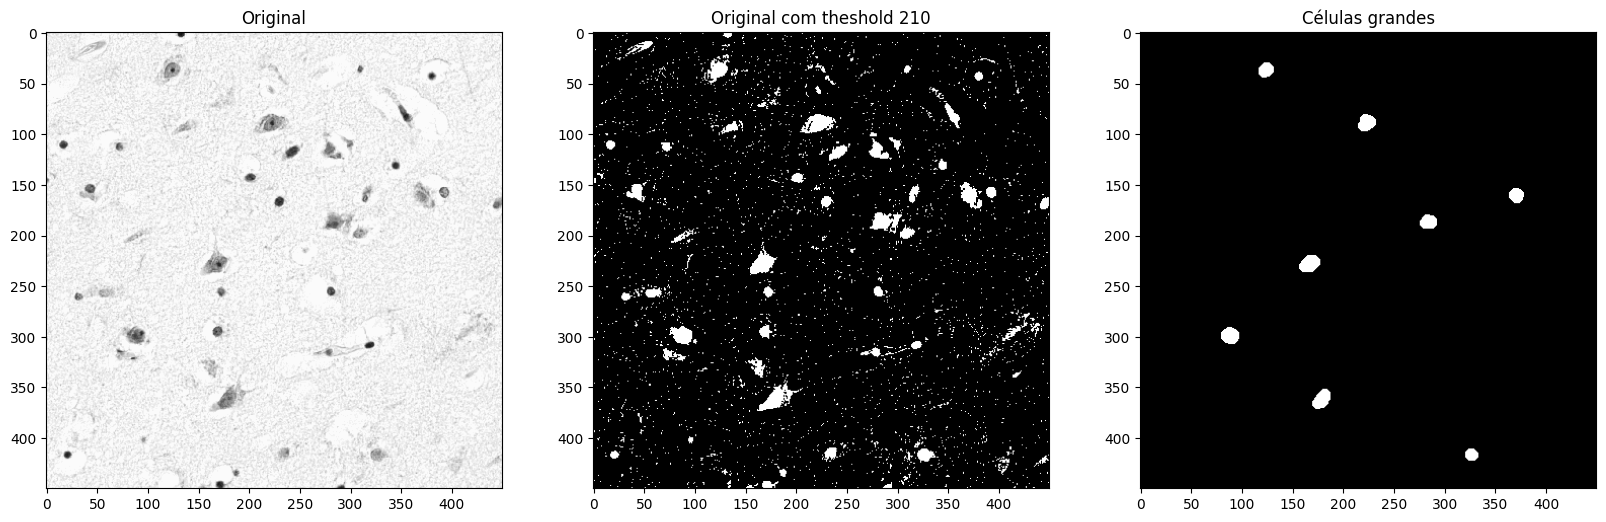

In [5]:
img1 = cv2.imread("cel4.png", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("cel4.png", cv2.IMREAD_GRAYSCALE)

i = (int)(0)
while(i < img1.shape[0]):
    j = (int)(0)
    while(j < img1.shape[1]):
        if(img1[i,j] <= 210):
            img2[i,j] = 255
        else:
            img2[i,j] = 0
        j += 1
    i += 1

#img2 = 255 * (img1 <= 210)


kernel = np.matrix([[0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
                    [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
                    [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
                    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                    [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
                    [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
                    [0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0]]).astype(np.uint8)

img3 = cv2.erode(img2, kernel, iterations=1) 
img3 = cv2.dilate(img3, kernel, iterations=1) 

plt.figure(figsize=(20, 15))

plt.subplot(1, 3, 1)
plt.title('Original')
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)

plt.subplot(1, 3, 2)
plt.title('Original com theshold 210')
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)

plt.subplot(1, 3, 3)
plt.title('Células grandes')
plt.imshow(img3, cmap='gray', vmin=0, vmax=255)

4)
Utilizando os conceitos já aprendidos na disciplina, faça um código que calcula a quantidade de objetos da imagem abaixo. Pode-se utilizar funções prontas do opencv (não para realizar a contagem em si, mas para realizar os passos necessários)

Quantidade de componenetes: 81
Quantidade de componenetes real: 89


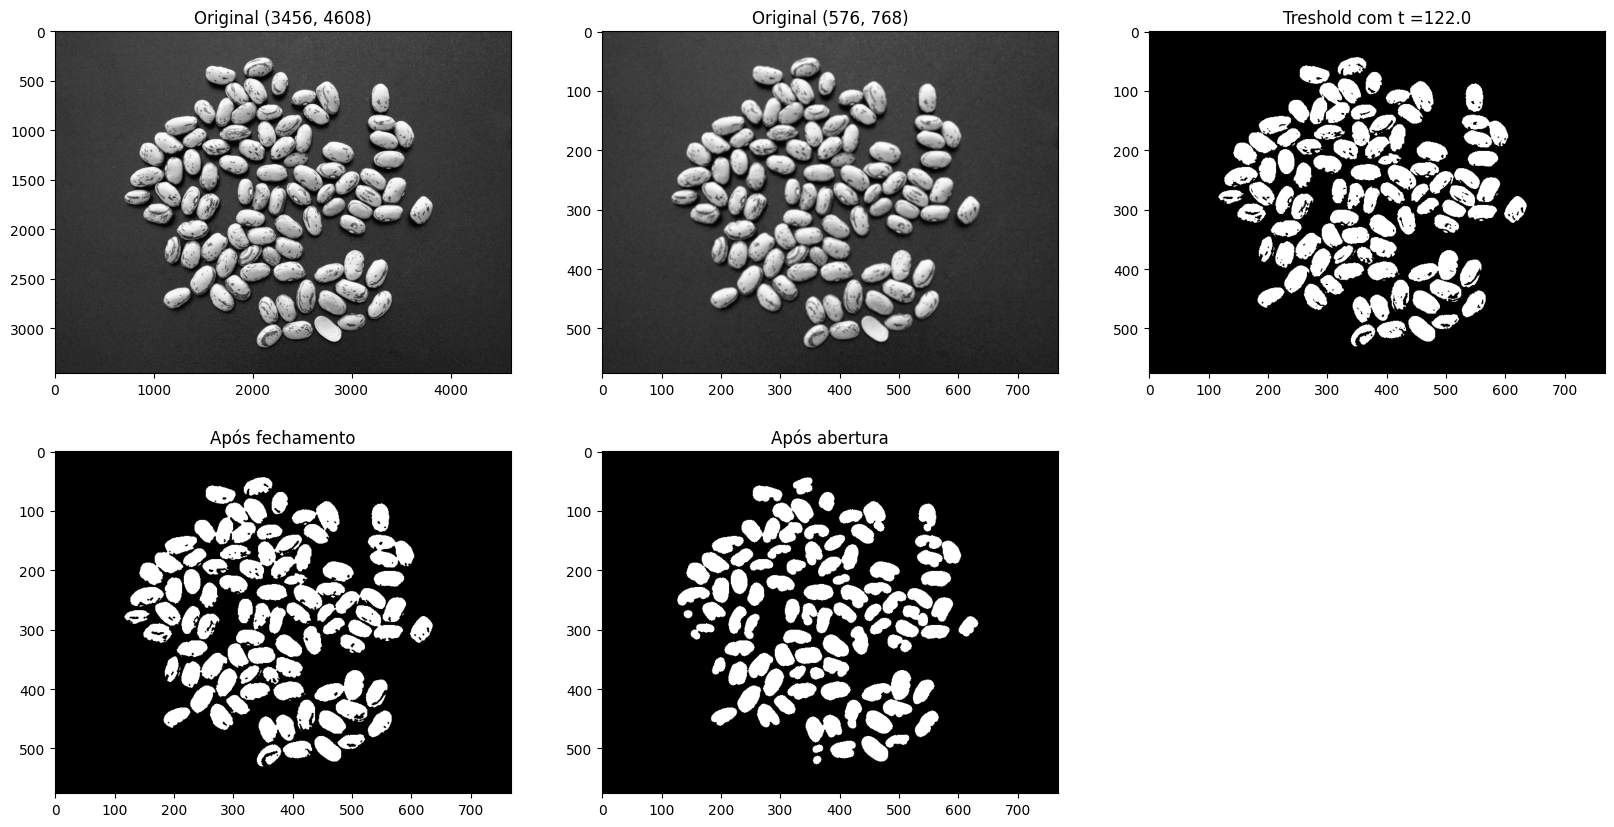

In [63]:
img1 = cv2.imread("feijao.jpg", cv2.IMREAD_GRAYSCALE)

# Diminuir o tamanho da imagem

newLinhas = (int)(img1.shape[0]/6)
newColunas = (int)(img1.shape[1]/6)

img2 = cv2.resize(img1, (newColunas, newLinhas))
img2 = cv2.GaussianBlur(img2, (3,3), 1)

# Otsu para limiarizar a imagem

lim = Otsu(img2)
lim = lim[256]

linhas = img2.shape[0]
colunas = img2.shape[1]

img3 = np.zeros((linhas, colunas))

i = (int)(0)
while(i < linhas):
    j = (int)(0)
    while(j < colunas):
        if(img2[i,j] <= lim):
            img3[i,j] = 0
        else:
            img3[i,j] = 255
        j += 1
    i += 1

##img3 = 255 * (1 - (img2 <= lim))

#

# Fechamento para tapar pequenos buracos na imagem

kernel = np.zeros((3,3))
cv2.circle(kernel, (1,1), 1, 1, -1)
kernel = kernel.astype(np.uint8)
img4 = cv2.dilate(img3, kernel, iterations=1) 
img4 = cv2.erode(img4, kernel, iterations=1)

#

# Abertura para separar objetos juntados

kernel = np.zeros((13,13))
cv2.circle(kernel, (6,6), 6, 1, -1)
kernel = kernel.astype(np.uint8)
img5 = cv2.erode(img4, kernel, iterations=1)
img5 = cv2.dilate(img5, kernel, iterations=1)

#

# Componentes conectados com BFS

qtdComp = (int)(0)

direcao = np.matrix([[-1,-1], [-1,0], [-1,1], [0,-1], [0,1], [1,-1], [1,0], [1,1]])

marc = np.zeros((linhas, colunas))

i = (int)(0)
while(i < linhas):
    j = (int)(0)
    while(j < colunas):

        if(marc[i,j] == 1 or img5[i,j] == 0):
            j += 1
            continue

        qtdComp += 1

        fila = np.matrix([[i,j]])

        while(fila.shape[0] != 0):
            
            lin = fila[0,0]
            col = fila[0,1]

            fila = fila[1:fila.shape[0]]

            k = (int)(0)

            while(k < 8):

                nlin = lin + direcao[k,0]
                ncol = col + direcao[k,1]

                if(0 <= nlin and nlin < linhas and
                   0 <= ncol and ncol < colunas and
                   img5[nlin,ncol] == 255 and marc[nlin,ncol] == 0):
                    
                    marc[nlin,ncol] = 1

                    aux = np.matrix([[nlin,ncol]])

                    fila = np.vstack((fila, aux))

                k += 1

        j += 1
    i += 1

#

print("Quantidade de componenetes:", qtdComp)
print("Quantidade de componenetes real: 89")

plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
plt.title('Original ' + (str)(img1.shape))
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)

plt.subplot(2, 3, 2)
plt.title('Original ' + (str)(img2.shape) + ' + suavização')
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)

plt.subplot(2, 3, 3)
plt.title('Treshold com t =' + (str)(lim))
plt.imshow(img3, cmap='gray', vmin=0, vmax=255)

plt.subplot(2, 3, 4)
plt.title('Após fechamento')
plt.imshow(img4, cmap='gray', vmin=0, vmax=255)

plt.subplot(2, 3, 5)
plt.title('Após abertura')
plt.imshow(img5, cmap='gray', vmin=0, vmax=255)